In [6]:
from keras.datasets import mnist

In [7]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
x_train.shape

(60000, 28, 28)

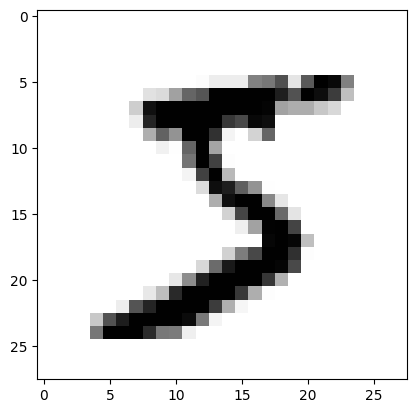

In [10]:
plt.imshow(x_train[0],cmap='gray_r')

In [11]:
y_train[0]

5

**If we submit this kind of data to network it gets confused and hard to proces also to recognize the pattern so now we do one hot encoding which changes the digit to o's and ones so for example if label data says 5 that means for one hot encoding [0,0,0,0,0,1,0,0,0,0] as we see here the 5th place gets one idicating the number is 5**

In [12]:
from keras.utils import to_categorical

In [13]:
y_cat_test=to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [14]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [15]:
y_train[0]

5

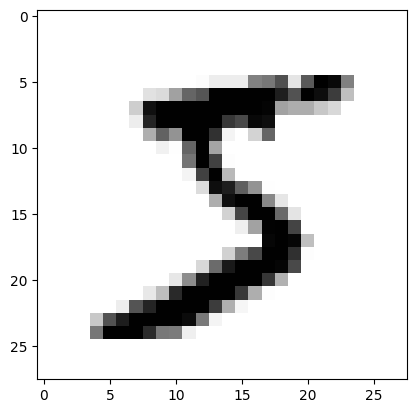

In [16]:
plt.imshow(x_train[0],cmap='gray_r')

In [17]:
x_train.max()

255

In [18]:
#we should normalize it 

In [19]:
x_train= x_train/x_train.max()

In [20]:
x_test=x_test/x_test.max()

In [21]:
x_train.max()

1.0

* we can see that by divding we got the value from 0 255 to 0 to 1
* This will make network to easily recognize the patterns

In [22]:
# now lets add color chanels data to the traininng set we have 

In [23]:
x_train = x_train.reshape(60000,28,28,1)

In [24]:
x_test = x_test.reshape(10000,28,28,1)

In [25]:
from keras.models import Sequential

In [26]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [30]:
model = Sequential()

#CON LAYER

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

#POOLING LAYER

model.add(MaxPool2D(pool_size=(2,2)))

#FLATTEN 2D->1D

model.add(Flatten())

#Dense Layer

model.add(Dense(128,activation='relu'))


#OUTPUT

model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])



/home/tanjiro/Github/cv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9091 - loss: 0.2867
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9855 - loss: 0.0494
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9913 - loss: 0.0299
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9939 - loss: 0.0202
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9955 - loss: 0.0162
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9967 - loss: 0.0104
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9975 - loss: 0.0083
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9982 - loss: 0.0051
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9990 - loss: 0.0037
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9992 - loss: 0.0031


In [33]:
model.evaluate(x_test,y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9868 - loss: 0.0599


[0.05110315978527069, 0.9889000058174133]

In [34]:
from sklearn.metrics import classification_report

In [45]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [46]:
predictions[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int32)

In [48]:
y_test[0]

7

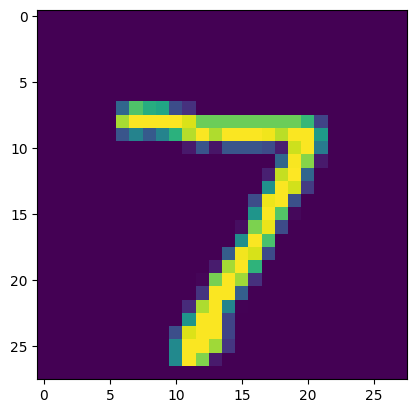

In [47]:
plt.imshow(x_test[0])

In [51]:
print(classification_report(y_cat_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



/home/tanjiro/Github/cv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
